# Sentiment Analysis Project  
## Notebook 01: Data Understanding & Problem Framing

This notebook focuses on understanding the dataset, exploring the basic structure,
and defining the problem statement from a data science perspective.


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


# import the XGBoost function for classification
from xgboost import XGBClassifier

import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Noise removal
import re

# nltk = text work
import nltk

# stopwords = useless words
from nltk.corpus import stopwords

# tokenize = split words
from nltk.tokenize import word_tokenize,sent_tokenize

# stem = cut words, lemma = real words
from nltk.stem import PorterStemmer, WordNetLemmatizer

# download needed files
nltk.download('punkt')        # word split
nltk.download('punkt_tab')    # extra split
nltk.download('stopwords')    # useless words list
nltk.download('wordnet')      # dictionary

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
path='/content/drive/MyDrive/NLP_GENAI_GL/PROJECT'

In [4]:
data=pd.read_csv(path+'/data/Combined Data.csv')

In [24]:
 df=data.copy()

In [12]:
df=data.copy()

## Problem Statement

The goal of this project is to build a sentiment analysis system using real-world
mental health related text data.

Given a text statement written by a user, the system should be able to analyze
the sentiment of the text and classify it into meaningful sentiment categories
that can later be simplified into Positive or Negative sentiment.


## Dataset Description

The dataset contains text statements related to mental health along with their
corresponding status labels.

Main columns:
- statement : Text written by users
- status    : Mental health category of the statement

This dataset is not a standard sentiment dataset, which allows us to apply
data science thinking while defining sentiment logic.


In [9]:
# Check dataset shape
df.shape

(53043, 2)

In [10]:
# Display column names
df.columns

Index(['statement', 'status'], dtype='object')

In [11]:
# Preview first few rows
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless heart. All out of tune",Anxiety
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",Anxiety
3,I've shifted my focus to something else but I'm still worried,Anxiety
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",Anxiety


## Data Types and Missing Values

In this step, we check:
- Data types of each column
- Presence of missing or null values

This helps ensure the dataset is clean enough for further processing.


In [13]:
# Check data types
df.dtypes

,0
statement,object
status,object


## Data Types Observation

Both columns in the dataset (`statement` and `status`) are of type **object**.

- `statement` : Text data written by users
- `status`    : Categorical label representing mental health condition

This is expected for an NLP problem, as text data is initially stored as object type
and will be transformed later during feature engineering.


In [14]:
# Check missing values
df.isnull().sum()

,0
statement,362
status,0


## Missing Values Analysis

- The `statement` column contains **362 missing values**
- The `status` column has **no missing values**

Since text is the primary feature in this project, missing statements will need
to be handled in the next preprocessing step (either removal or imputation).


## Target Variable Analysis

The `status` column represents different mental health categories.
Before building any model, we need to understand how many unique labels
exist and their distribution.

This step is important to identify class imbalance and decide
how sentiment labels will be created later.


In [15]:
# Check unique labels
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [16]:
# Count of each label
df['status'].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


## Target Variable Distribution

The dataset contains multiple mental health categories with varying frequencies.

Key observations:
- `Normal` and `Depression` are the most frequent classes
- `Suicidal` also has a significant number of samples
- `Personality disorder`, `Stress`, and `Bipolar` have fewer samples

This indicates that the dataset is **imbalanced**, which is common in real-world
mental health data and will be addressed in later stages.


## Class Distribution Visualization

Visualizing the distribution of mental health categories helps us:
- Understand imbalance in the dataset
- Decide whether resampling will be required later


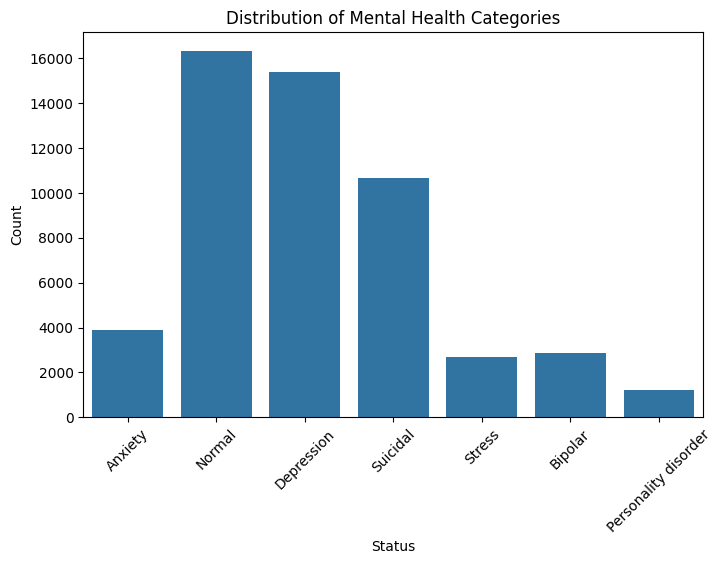

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='status')
plt.xticks(rotation=45)
plt.title("Distribution of Mental Health Categories")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

## Class Imbalance Insight

The bar chart clearly shows class imbalance across mental health categories.

Such imbalance can negatively impact model performance if not handled properly.
In later notebooks, techniques such as resampling or class-weighted models
may be explored to mitigate this issue.


## Text Length Analysis

Analyzing the length of text statements helps us understand:
- Whether statements are short or long
- What kind of text preprocessing will be needed later


In [21]:
# Create text length feature
df['text_length'] = df['statement'].astype(str).apply(len)

df[['statement', 'text_length']].head()

,statement,text_length
0,oh my gosh,10
1,"trouble sleeping, confused mind, restless heart. All out of tune",64
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",78
3,I've shifted my focus to something else but I'm still worried,61
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",72


In [22]:
# Summary statistics of text length
df['text_length'].describe()

,text_length
count,53043.000000
mean,574.784816
std,844.707198
min,2.000000
25%,77.000000
50%,313.000000
75%,748.000000
max,32759.000000


## Text Length Feature

A new feature `text_length` was created to understand how long user statements are.

This feature helps in:
- Understanding sentence and paragraph length variation
- Deciding appropriate text preprocessing techniques
- Identifying extremely short or very long statements


## Text Length Statistics

From the summary statistics:
- Text length varies significantly across statements
- Some statements are very short (few characters)
- Some statements are extremely long

This variation confirms that the dataset contains both short expressions
and long descriptive texts, making it suitable for real-world NLP modeling.


## Distribution of Text Length

This plot shows how text length is distributed across the dataset.


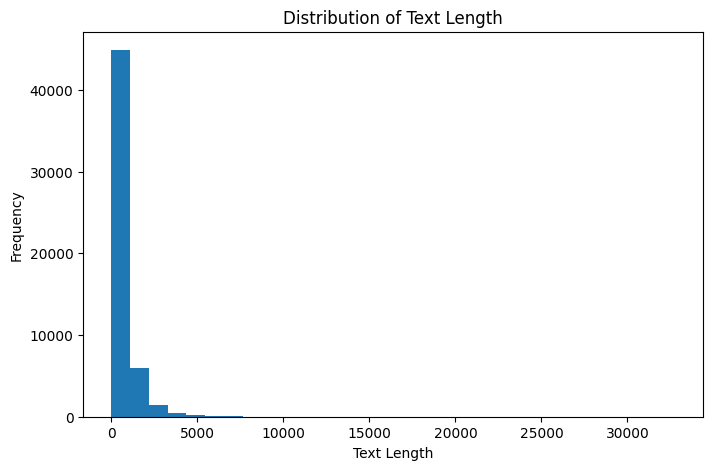

In [23]:
plt.figure(figsize=(8,5))
plt.hist(df['text_length'], bins=30)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

## Text Length Distribution Analysis

The histogram shows a **right-skewed distribution** of text length.

Key insights:
- Majority of statements are short to medium length
- A small number of statements are very long, creating a long tail

This is typical for user-generated text and suggests that
outlier handling or text truncation strategies may be required later.


## Summary of Data Understanding

- The dataset contains real-world mental health related text data
- Text data requires preprocessing due to missing values and length variation
- Multiple mental health categories are present with class imbalance
- The dataset is suitable for sentiment analysis after defining
  appropriate sentiment mapping logic

In the next notebook, text cleaning and preprocessing techniques
will be applied to prepare the data for modeling.
